# Lake model continued

In the previous week you used the lake problem as a means of getting aquinted with the workbench. In this assignment we will continue with the lake problem, focussing explicitly on using it for open exploration. You can use the second part of [this tutorial](https://emaworkbench.readthedocs.io/en/latest/indepth_tutorial/open-exploration.html) for help.

**It is paramount that you are using the lake problem with 100 decision variables, rather than the one found on the website with the seperate anthropogenic release decision**

## Apply scenario discovery

1. Generate 10 policies and 1000 scenarios and evaluate them.
2. The experiments array contains the values for each of the 100 decision levers. This might easily mess up the analysis. Remove these columns from the experiment array. *hint: use `experiments.drop`*
3. Apply scenario discovery, focussing on the 10 percent of worst outcomes for reliability


In [1]:
from ema_workbench import (RealParameter, ScalarOutcome, Constant, Model)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
'''
Created on May 2, 2017

@author: jhkwakkel
'''
import math
import numpy as np

from scipy.optimize import brentq

def lake_problem(b=0.42, q=2.0, mean=0.02, stdev=0.0017, delta=0.98,      
                 alpha=0.4, nsamples=100, steps=100, l0=0, l1=0, l2=0, l3=0,
                 l4=0, l5=0, l6=0, l7=0, l8=0, l9=0, l10=0, l11=0, l12=0, l13=0,
                 l14=0, l15=0, l16=0, l17=0, l18=0, l19=0, l20=0, l21=0, l22=0,
                 l23=0, l24=0, l25=0, l26=0, l27=0, l28=0, l29=0, l30=0, l31=0,
                 l32=0, l33=0, l34=0, l35=0, l36=0, l37=0, l38=0, l39=0, l40=0,
                 l41=0, l42=0, l43=0, l44=0, l45=0, l46=0, l47=0, l48=0, l49=0,
                 l50=0, l51=0, l52=0, l53=0, l54=0, l55=0, l56=0, l57=0, l58=0,
                 l59=0, l60=0, l61=0, l62=0, l63=0, l64=0, l65=0, l66=0, l67=0,
                 l68=0, l69=0, l70=0, l71=0, l72=0, l73=0, l74=0, l75=0, l76=0,
                 l77=0, l78=0, l79=0, l80=0, l81=0, l82=0, l83=0, l84=0, l85=0,
                 l86=0, l87=0, l88=0, l89=0, l90=0, l91=0, l92=0, l93=0, l94=0,
                 l95=0, l96=0, l97=0, l98=0, l99=0,):   
    decisions = np.array([l0, l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12, l13,
                          l14, l15, l16, l17, l18, l19, l20, l21, l22, l23, l24, l25,
                          l26, l27, l28, l29, l30, l31, l32, l33, l34, l35, l36, l37,
                          l38, l39, l40, l41, l42, l43, l44, l45, l46, l47, l48, l49,
                          l50, l51, l52, l53, l54, l55, l56, l57, l58, l59, l60, l61,
                          l62, l63, l64, l65, l66, l67, l68, l69, l70, l71, l72, l73,
                          l74, l75, l76, l77, l78, l79, l80, l81, l82, l83, l84, l85,
                          l86, l87, l88, l89, l90, l91, l92, l93, l94, l95, l96, l97,
                          l98, l99])
    
    Pcrit = brentq(lambda x: x**q/(1+x**q) - b*x, 0.01, 1.5)
    nvars = len(decisions)
    X = np.zeros((nvars,))
    average_daily_P = np.zeros((nvars,))
    decisions = np.array(decisions)
    reliability = 0.0

    for _ in range(nsamples):
        X[0] = 0.0
        
        natural_inflows = np.random.lognormal(
                math.log(mean**2 / math.sqrt(stdev**2 + mean**2)),
                math.sqrt(math.log(1.0 + stdev**2 / mean**2)),
                size = nvars)
        
        for t in range(1,nvars):
            X[t] = (1-b)*X[t-1] + X[t-1]**q/(1+X[t-1]**q) + decisions[t-1] +\
                    natural_inflows[t-1]
            average_daily_P[t] += X[t]/float(nsamples)
    
        reliability += np.sum(X < Pcrit)/float(nsamples*nvars)
      
    max_P = np.max(average_daily_P)
    utility = np.sum(alpha*decisions*np.power(delta,np.arange(nvars)))
    inertia = np.sum(np.abs(np.diff(decisions)) > 0.02)/float(nvars-1)

    return max_P, utility, inertia, reliability


In [4]:
def create_scenarios(decisions):
    decision_list = []
    for decision in decisions:
        decision = float(decision)
        rand_val = np.random.uniform(0, 0.1)
        decision_list.append(rand_val)
    decision_array = np.array(decision_list)
    return decision_array

In [13]:
model = Model('lakeproblem', function=lake_problem)

#specify uncertainties
model.uncertainties = [RealParameter('mean', 0.01, 0.02),
                       RealParameter('stdev', 0.001, 0.005),
                       RealParameter('b', 0.1, 0.45),
                       RealParameter('q', 2, 4.5),
                       RealParameter('delta', 0.93, 0.99)]

#set levers
model.levers= [RealParameter('l0', 0, 0.1),
               RealParameter('l1', 0, 0.1),
               RealParameter('l2', 0, 0.1),
               RealParameter('l3', 0, 0.1),
               RealParameter('l4', 0, 0.1),
               RealParameter('l5', 0, 0.1),
               RealParameter('l6', 0, 0.1),
               RealParameter('l7', 0, 0.1),
               RealParameter('l8', 0, 0.1),
               RealParameter('l9', 0, 0.1)
               ]

#specify outcomes
model.outcomes = [ScalarOutcome('max_P'),
                  ScalarOutcome('utility'),
                  ScalarOutcome('inertia'),
                  ScalarOutcome('reliability')]

In [35]:
with SequentialEvaluator(model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=1000, policies = 10)

[MainProcess/INFO] performing 1000 scenarios * 10 policies * 1 model(s) = 10000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7000 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 9000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] experiments finished


In [36]:
experiments

,b,delta,mean,q,stdev,l0,l1,l2,l3,l4,l5,l6,l7,l8,l9,scenario,policy,model
0,0.211492,0.978124,0.012893,2.287920,0.003809,0.007278,0.008048,0.029432,0.016778,0.027407,0.092669,0.029508,0.064549,0.092507,0.088681,7000,30,lakeproblem
1,0.276817,0.944849,0.012273,3.872756,0.003310,0.007278,0.008048,0.029432,0.016778,0.027407,0.092669,0.029508,0.064549,0.092507,0.088681,7001,30,lakeproblem
2,0.409291,0.979405,0.010709,4.469247,0.002928,0.007278,0.008048,0.029432,0.016778,0.027407,0.092669,0.029508,0.064549,0.092507,0.088681,7002,30,lakeproblem
3,0.299428,0.936177,0.014949,2.939470,0.001114,0.007278,0.008048,0.029432,0.016778,0.027407,0.092669,0.029508,0.064549,0.092507,0.088681,7003,30,lakeproblem
4,0.395903,0.958830,0.010608,3.642634,0.001198,0.007278,0.008048,0.029432,0.016778,0.027407,0.092669,0.029508,0.064549,0.092507,0.088681,7004,30,lakeproblem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.270686,0.985405,0.018208,2.440948,0.002126,0.062194,0.041632,0.016983,0.088371,0.002967,0.022967,0.076025,0.028889,0.072861,0.075850,7995,39,lakeproblem
9996,0.155931,0.949797,0.015866,2.466676,0.001354,0.062194,0.041632,0.016983,0.088371,0.002967,0.022967,0.076025,0.028889,0.072861,0.075850,7996,39,lakeproblem
9997,0.120779,0.943078,0.019223,2.379940,0.003732,0.062194,0.041632,0.016983,0.088371,0.002967,0.022967,0.076025,0.028889,0.072861,0.075850,7997,39,lakeproblem
9998,0.131954,0.977761,0.010115,2.435770,0.003700,0.062194,0.041632,0.016983,0.088371,0.002967,0.022967,0.076025,0.028889,0.072861,0.075850,7998,39,lakeproblem


In [70]:
experiments_good = experiments.drop(['l0', 'l1', 'l2', 'l3', 'l4', 'l5','l6','l7','l8','l9',
                                     'model', 'policy'], axis='columns')

In [71]:
experiments_good

,b,delta,mean,q,stdev
0,0.211492,0.978124,0.012893,2.287920,0.003809
1,0.276817,0.944849,0.012273,3.872756,0.003310
2,0.409291,0.979405,0.010709,4.469247,0.002928
3,0.299428,0.936177,0.014949,2.939470,0.001114
4,0.395903,0.958830,0.010608,3.642634,0.001198
...,...,...,...,...,...
9995,0.270686,0.985405,0.018208,2.440948,0.002126
9996,0.155931,0.949797,0.015866,2.466676,0.001354
9997,0.120779,0.943078,0.019223,2.379940,0.003732
9998,0.131954,0.977761,0.010115,2.435770,0.003700


In [79]:
from ema_workbench.analysis import prim

x = experiments_good
y = outcomes['reliability'] < 0.1
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] 10000 points remaining, containing 2104 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.067, coverage: 0.31844106463878324, density: 1.0 restricted_dimensions: 2


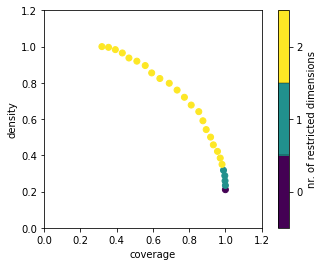

In [80]:
box1.show_tradeoff()
plt.show()

## Visualize the results using Dimensional Stacking
Take the classification of outcomes as used in step 3 of scenario discovery, and instead visualize the results using dimensional stacking. How do these results compare to the insights from scenario discovery?

[MainProcess/INFO] model dropped from analysis because only a single category


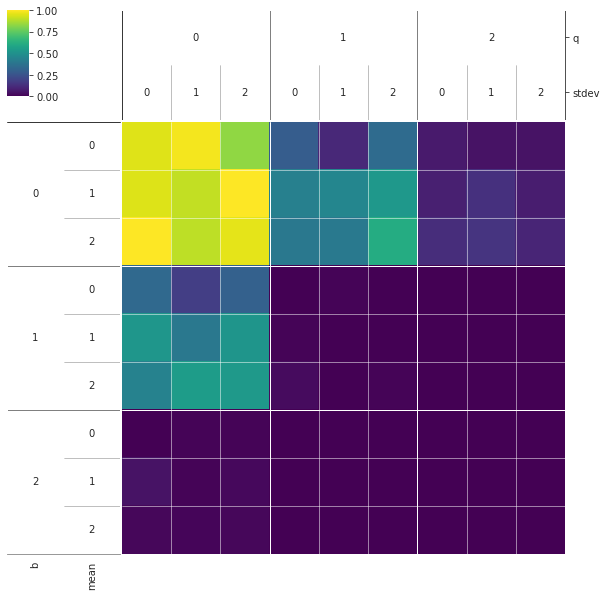

In [85]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes['reliability'] <0.1
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()